## import statements and EDA

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import string
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

In [0]:
!pip install nltk

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
#for connecting to google drive
!pip install -U -q PyDrive              

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1V3SSQd5YcoLfJ8_0CTT4k_4-LKGn91iT'

In [0]:
fluff, id = link.split('=')
print (id) 

1V3SSQd5YcoLfJ8_0CTT4k_4-LKGn91iT


In [0]:
downloaded1 = drive.CreateFile({'id':id}) 
downloaded1.GetContentFile('train.tsv') 

In [0]:
data = pd.read_table('train.tsv', engine='c')
print('Train set size: {}'.format(len(data)))


Train set size: 1482535


In [0]:
data['brand_name'].unique

<bound method Series.unique of 0                  NaN
1                Razer
2               Target
3                  NaN
4                  NaN
              ...     
1482530    Free People
1482531         Disney
1482532            NaN
1482533            NaN
1482534            NaN
Name: brand_name, Length: 1482535, dtype: object>

In [0]:
data.head(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...


In [0]:
data.to_pickle("./dummy.pkl")

In [0]:
data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [0]:
data.shape

(1482535, 8)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [0]:
data.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [0]:
data.shape

(1482535, 8)

In [0]:
len(data)

1482535

In [0]:
data.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [0]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [0]:
missing_values_table(data)

Your selected dataframe has 8 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
brand_name,632682,42.7
category_name,6327,0.4
item_description,4,0.0


## Price Column

In [0]:
data['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

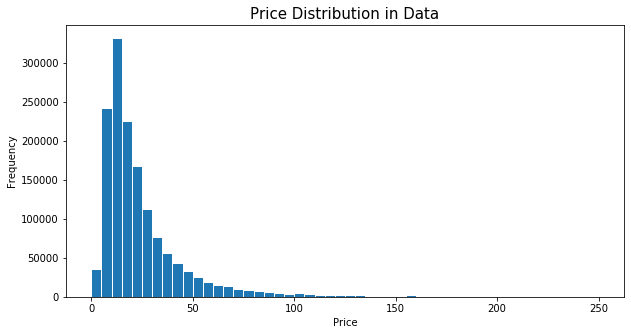

In [0]:
data['price'].plot.hist(bins=50, figsize=(10,5), edgecolor='white',range=[0,250])
plt.xlabel('Price', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.tick_params(labelsize=10)
plt.title('Price Distribution in Data', fontsize=15)
plt.show()

Price distribution is Right skewed

In [0]:
print("mean : ", data['price'].mean())
print("median : ", data['price'].median())

mean :  26.737516146330442
median :  17.0


Based on the the above statistics, the observations are as follows:

The median price of the items is 17 dollars.
Around 90% of the items have price around 51 dollars or below.
The Price distribution of the items is heavily skewed to the right.

In [0]:
rowLess40 = len(data[data['price'] < 27])
rowsGreater40 = len(data[data['price'] >= 27])

rowLess40Percentage = (rowLess40/len(data)) * 100
print(rowLess40Percentage)

72.00619209664526


In [0]:
# log transformation of price variable, to have a normal distribution.
log_transform_price = np.log(data['price'] + 1)
log_transform_price.describe()

count    1.482535e+06
mean     2.979059e+00
std      7.492094e-01
min      0.000000e+00
25%      2.397895e+00
50%      2.890372e+00
75%      3.401197e+00
max      7.605890e+00
Name: price, dtype: float64

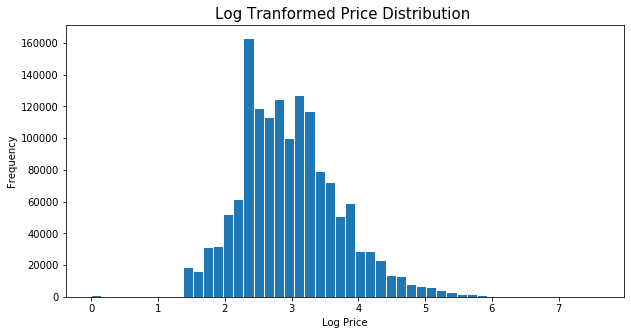

In [0]:
log_transform_price.plot.hist(bins=50, figsize=(10,5), edgecolor='white',range=[0,7.6])
plt.xlabel('Log Price', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.tick_params(labelsize=10)
plt.title('Log Tranformed Price Distribution ', fontsize=15)
plt.show()

## Shipping Column

The shipping cost burden is decently splitted between sellers and buyers with more than half of the items' shipping fees are paid by the sellers (55%). In addition, the average price paid by users who have to pay for shipping fees is lower than those that don't require additional shipping cost. This matches with our perception that the sellers need a lower price to compensate for the additional shipping.

In [0]:
data['shipping'].value_counts()

0    819435
1    663100
Name: shipping, dtype: int64

In [0]:
data['shipping'].value_counts(normalize=True)*100

0    55.272557
1    44.727443
Name: shipping, dtype: float64

In [0]:
shipping_fee_by_seller = data.loc[data.shipping==1, 'price']
shipping_fee_by_buyer = data.loc[data.shipping==0, 'price']



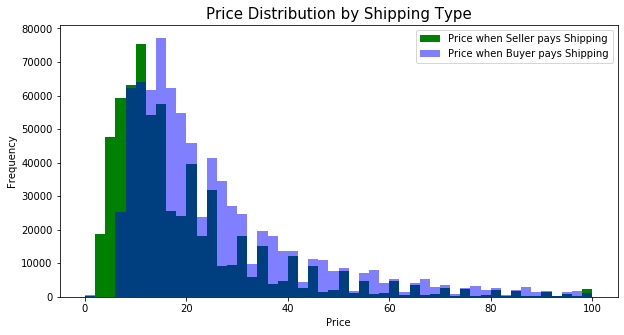

In [0]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(shipping_fee_by_seller, color='Green', alpha=1.0, bins=50, range=[0,100], label='Price when Seller pays Shipping')
ax.hist(shipping_fee_by_buyer, color='Blue', alpha=0.5, bins=50, range=[0,100], label='Price when Buyer pays Shipping', )
ax.set(title='Histogram Comparison', ylabel='% of Dataset in Bin')
plt.xlabel('Price', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Price Distribution by Shipping Type', fontsize=15)
plt.tick_params(labelsize=10)
plt.legend()
plt.show()

In [0]:
data['price'].mean()

26.737516146330442

In [0]:
data['price'].max()

2009.0

In [0]:
data['log_transform_price'] = log_transform_price

In [0]:
data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'log_transform_price'],
      dtype='object')

In [0]:
shipping_fee_by_seller_log = data[['log_transform_price']].loc[data.shipping==1, 'log_transform_price']
shipping_fee_by_buyer_log = data[['log_transform_price']].loc[data.shipping==0, 'log_transform_price']

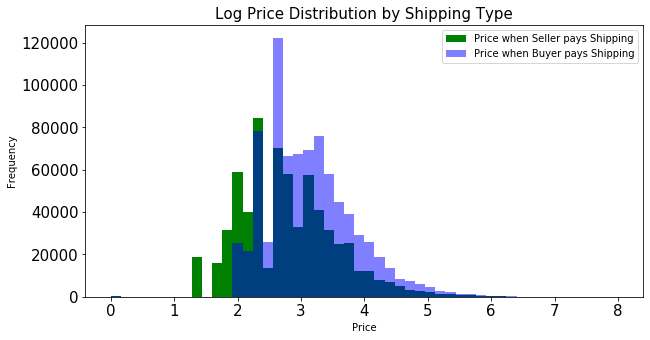

In [0]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(shipping_fee_by_seller_log, color='Green', alpha=1.0, bins=50, range=[0,8], label='Price when Seller pays Shipping')
ax.hist(shipping_fee_by_buyer_log, color='Blue', alpha=0.5, bins=50, range=[0,8], label='Price when Buyer pays Shipping', )
ax.set(title='Histogram Comparison', ylabel='% of Dataset in Bin')
plt.xlabel('Price', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Log Price Distribution by Shipping Type', fontsize=15)
plt.tick_params(labelsize=15)
plt.legend()
plt.show()

Stats with out applying log.

In [0]:
print('The median price is ${}'.format(round(shipping_fee_by_seller.median(), 2)), 'if seller pays shipping')
print('The median price is ${}'.format(round(shipping_fee_by_buyer.median(), 2)), 'if buyer pays shipping')

print('The mean price is ${}'.format(round(shipping_fee_by_seller.mean(), 2)), 'if seller pays shipping')
print('The mean price is ${}'.format(round(shipping_fee_by_buyer.mean(), 2)), 'if buyer pays shipping')

The median price is $14.0 if seller pays shipping
The median price is $20.0 if buyer pays shipping
The mean price is $22.57 if seller pays shipping
The mean price is $30.11 if buyer pays shipping


Some observations are as follows:-

The shipping fee for 55% of the items are paid by the buyers.
Normally when we buy products online, we need to pay for shipping or delivery for products which are below a certain price. But here the trend is kind of opposite since the median price of items for which the seller pays the shipping fees is lower than the median price of the items for which the buyer pays the shipping fees.

## item Condition


The 'item_condition_id' has five unique values ranging from 1 to 5. Lower the number, better the condition of the item.

In [0]:
data['item_condition_id'].value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

In [0]:
data['item_condition_id'].value_counts(normalize=True, sort=False)*100

1    43.206332
2    25.326822
3    29.150138
4     2.155902
5     0.160806
Name: item_condition_id, dtype: float64

In [0]:
data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'log_transform_price'],
      dtype='object')

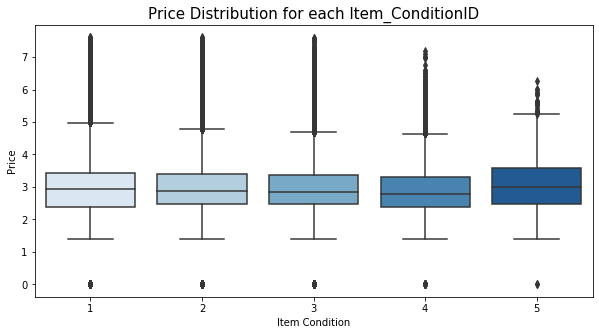

In [0]:
# price_100 = data['log_transform_price']

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='item_condition_id', y='log_transform_price', data=data, ax=ax, palette= "Blues")
plt.xlabel('Item Condition', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.title(label = "Price Distribution for each Item_ConditionID", size=15,)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Some observations are as follows:

43% of the items have item condition ID as 1 while only 0.16% of the items have item condition ID has 5.
Interestingly, items with item condition ID as 5 have higher median price when compared with items having better condition.


In [0]:
data[data['item_condition_id'] == 5]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_transform_price
258,258,ACER Laptop,5,NaN,NaN,14.0,0,"Powers on, no screen display, no external dama...",2.708050
653,653,Fossil vintage renewal purse,5,Women/Women's Handbags/Shoulder Bag,Fossil,36.0,0,No description yet,3.610918
1027,1027,Broken necklace,5,Women/Jewelry/Necklaces,NaN,20.0,1,"10k gold 18"" chain. Broken at clasp.",3.044522
2436,2436,Gameboy advance sp ags-101 FOR PARTS,5,Other/Other/Other,NaN,24.0,0,For parts . Turns on and hold battery charge ....,3.218876
2803,2803,"2 Pounds Of ""Junk"" Jewelry",5,Handmade/Jewelry/Jewelry,NaN,11.0,0,"2 pounds of junk jewelry, There are some items...",2.484907
...,...,...,...,...,...,...,...,...,...
1481301,1481301,Apple watch 1 for parts AS is,5,Vintage & Collectibles/Antique/Electronics,NaN,48.0,0,This is a Apple Watch 1st generation it works ...,3.891820
1481592,1481592,motherboard.,5,Electronics/Computers & Tablets/Components & P...,NaN,10.0,0,selling the motherboard and speaker only pictu...,2.397895
1481709,1481709,iPhone 5s Verizon unlocked,5,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,49.0,0,This phone is iCloud unlocked. It will also ne...,3.912023
1481811,1481811,IPhone 6,5,Electronics/Cell Phones & Accessories/Cell Pho...,Apple,40.0,0,Activation lock cracked comes with case no cha...,3.713572


## Item Category or Category Name

In [0]:
data['category_name'].value_counts()[:5]

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
Name: category_name, dtype: int64

In [0]:
print("There are %d unique main categories." % data['category_name'].nunique())

There are 1287 unique main categories.


There are about 1,287 unique categories but among each of them, we will always see a main/general category firstly, followed by two more particular subcategories (e.g. Beauty/Makeup/Face or Lips). In adidition, there are about 6,327 items that do not have a category labels. Let's split the categories into three different columns. We will see later that this information is actually quite important from the seller's point of view and how we handle the missing information in the brand_name column will impact the model's prediction.


In [0]:
data[data['category_name'] == 'Category Unknown']

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_transform_price


In [0]:
data['category_name'].isnull().sum()

6327

In [0]:
def split_category(text):
    try: return text.split("/")
    except: return ("Category Unknown", "Category Unknown", "Category Unknown")
    
data['main_category'], data['subcategory_1'], data['subcategory_2'] = zip(*data['category_name'].apply(lambda x: split_category(x)))
# test['main_cat'], test['subcat_1'], test['subcat_2'] = zip(*test['category_name'].apply(lambda x: split_cat(x)))
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_transform_price,main_category,subcategory_1,subcategory_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces


In [0]:
# unique categories in Main category
print("No. of unique categories in main categories: ", len(data['main_category'].value_counts()))
data['main_category'].value_counts()

No. of unique categories in main categories:  11


Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Category Unknown            6327
Name: main_category, dtype: int64

In [0]:
print("There are %d unique main categories." % data['main_category'].nunique())
print("There are %d unique first sub-categories." % data['subcategory_1'].nunique())
print("There are %d unique second sub-categories." % data['subcategory_2'].nunique())

There are 11 unique main categories.
There are 114 unique first sub-categories.
There are 871 unique second sub-categories.


In [0]:
data['main_category'].value_counts(normalize=True)*100

Women                     44.814119
Beauty                    14.018421
Kids                      11.580772
Electronics                8.275690
Men                        6.318906
Home                       4.578037
Vintage & Collectibles     3.138543
Other                      3.059017
Handmade                   2.080356
Sports & Outdoors          1.709369
Category Unknown           0.426769
Name: main_category, dtype: float64

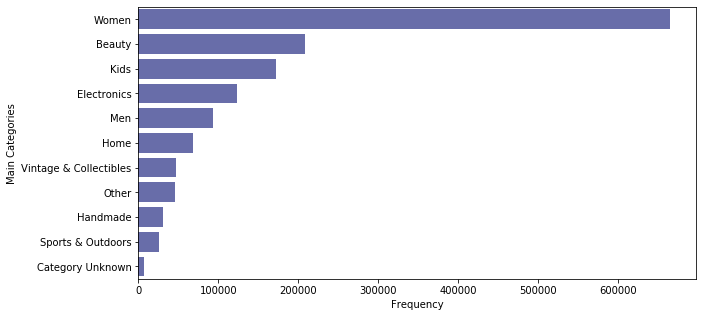

In [0]:
order=(data['main_category'].value_counts()).index
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(y = data['main_category'],  color = '#5D64B4', order=order ,ax=ax)
plt.ylabel('Main Categories', fontsize=10)
plt.xlabel('Frequency', fontsize=10)
# plt.title("Frequency of Main Category Items", size = 15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

In [0]:
main_category = data.groupby('main_category')
main_category_median = pd.DataFrame(main_category['price'].median())
main_category_median = main_category_median.sort_values(ascending=True, by='price')
main_category_median

,price
main_category,
Handmade,12.0
Kids,14.0
Other,14.0
Beauty,15.0
Electronics,15.0
Category Unknown,16.0
Sports & Outdoors,16.0
Vintage & Collectibles,16.0
Home,18.0


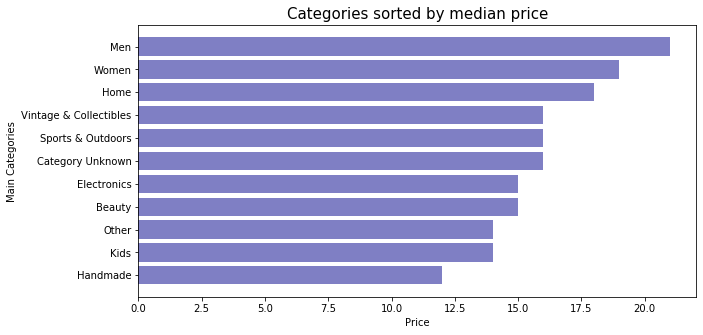

In [0]:
plt.figure(figsize=(10,5))
plt.barh(range(0,len(main_category_median)), main_category_median['price'], align='center', alpha=0.5, color= 'darkblue')
plt.yticks(range(0,len(main_category_median)), main_category_median.index, fontsize=10)
plt.xticks(fontsize=10)
plt.title('Categories sorted by median price', fontsize=15)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Main Categories', fontsize=10)
plt.show()


44.8% of the total products belong to 'Women' category followed by 'Beauty' category products which takes up around 14% of the total products while 1.7% of the products, being the minimum, belong to the 'Sports and Outdoor' category.

The items from 'Men' category have the highest median price of 21 dolars followed by the items from 'Women' category having a median price of 19 dollars while the items from 'Handmade' category has the lowest median price of 12 dollars.

**First Subcategory**

In [0]:
data['subcategory_1'].value_counts(normalize=True).head(10)

Athletic Apparel             0.090644
Makeup                       0.084061
Tops & Blouses               0.072147
Shoes                        0.067757
Jewelry                      0.041660
Toys                         0.039229
Cell Phones & Accessories    0.035945
Women's Handbags             0.030935
Dresses                      0.030865
Women's Accessories          0.028566
Name: subcategory_1, dtype: float64

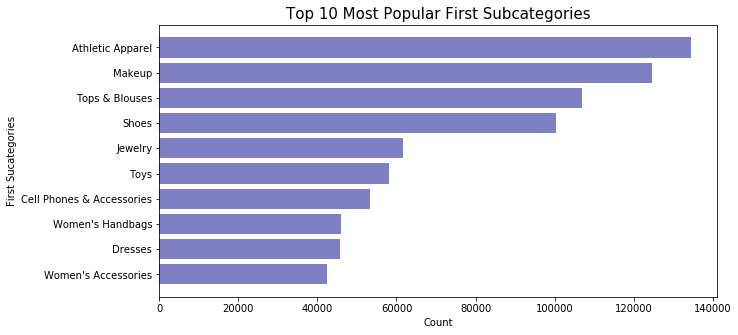

In [0]:
x = data['subcategory_1'].value_counts().index[:10]
y = data['subcategory_1'].value_counts().values[:10]

plt.figure(figsize=(10,5))
plt.barh(range(len(x),0,-1), y, align='center', alpha=0.5, color='darkblue')
plt.yticks(range(len(x),0,-1), x, fontsize=10)
plt.xticks(fontsize=10)
plt.title('Top 10 Most Popular First Subcategories', fontsize=15)
plt.xlabel('Count', fontsize=10)
plt.ylabel('First Sucategories', fontsize=10)
plt.show()




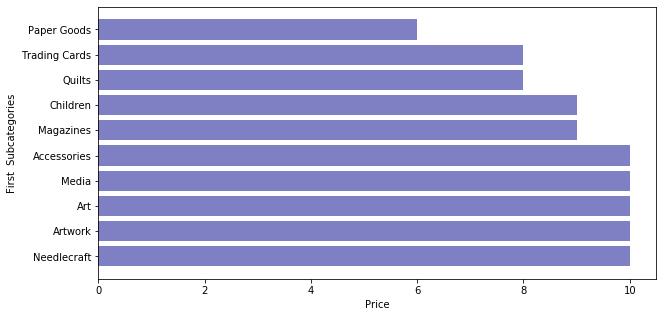

In [0]:

subcat_1 = data.groupby('subcategory_1')
subcat_1_median = pd.DataFrame(subcat_1['price'].median())
subcat_1_median = subcat_1_median.sort_values(ascending=False, by='price')
subcat_1_median_top = subcat_1_median[-10:]
subcat_1_median_bottom = subcat_1_median[0:10]

plt.figure(figsize=(10,5))
plt.barh(range(0,len(subcat_1_median_top)), subcat_1_median_top['price'], align='center', alpha=0.5, color='darkblue')
plt.yticks(range(0,len(subcat_1_median_top)), subcat_1_median_top.index, fontsize=10)
plt.xticks(fontsize=10)
# plt.title('Top 10 First Subcategories sorted by median price', fontsize=15)
plt.xlabel('Price', fontsize=10)
plt.ylabel('First  Subcategories', fontsize=10)
plt.show()


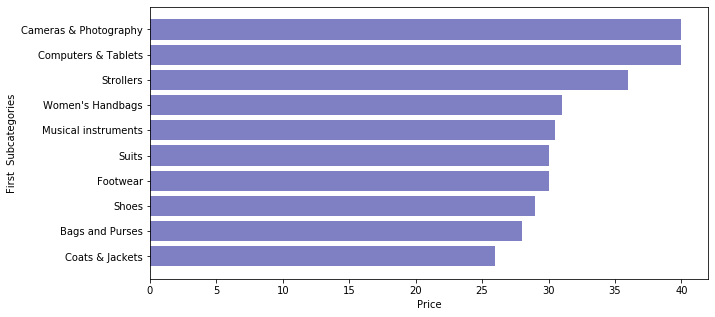

In [0]:
plt.figure(figsize=(10,5))
plt.barh(range(len(subcat_1_median_bottom),0,-1), subcat_1_median_bottom['price'], align='center', alpha=0.5, color='darkblue')
plt.yticks(range(len(subcat_1_median_bottom),0,-1), subcat_1_median_bottom.index, fontsize=10)
plt.xticks(fontsize=10)
# plt.title('Bottom 10 First Subcategories sorted by median price', fontsize=15)
plt.xlabel('Price', fontsize=10)
plt.ylabel('First  Subcategories', fontsize=10)
plt.show()



The most popular subcategory is 'Athletic Apparel' which aligns with the previous observation that the most popular main category is 'Women' and 'Athletic Apparel' comes under both the 'Women' and 'Men' categories. 9% of the total products comes under the Athletic Apparel category.

From the perspective of the median price of the items, the items from the subcategory of 'Computers & Tablets' have the highest median price, with the median price being 40 dollars.

The items from the subcategory 'Paper Goods' have the lowest median price of 6 dollars. 'Paper Goods' come under the 'Handmade' category. This also validates the previous observation that the items from 'Handmade' category have the lowest median price out of all the main categories.

**Second Subcategory**

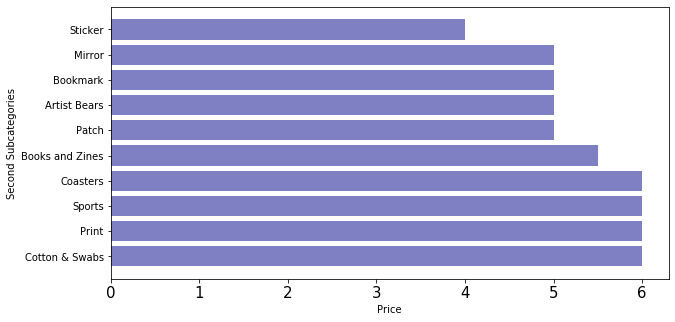

In [0]:
subcat_2 = data.groupby('subcategory_2')
subcat_2_median = pd.DataFrame(subcat_2['price'].median())
subcat_2_median = subcat_2_median.sort_values(ascending=False, by='price')
subcat_2_median_top = subcat_2_median[-10:]
subcat_2_median_bottom = subcat_2_median[0:10]

plt.figure(figsize=(10,5))
plt.barh(range(0,len(subcat_2_median_top)), subcat_2_median_top['price'], align='center', alpha=0.5, color='darkblue')
plt.yticks(range(0,len(subcat_2_median_top)), subcat_2_median_top.index, fontsize=10)
plt.xticks(fontsize=15)
# plt.title('Top 10 Second Subcategories sorted by median price', fontsize=15)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Second Subcategories', fontsize=10)
plt.show()


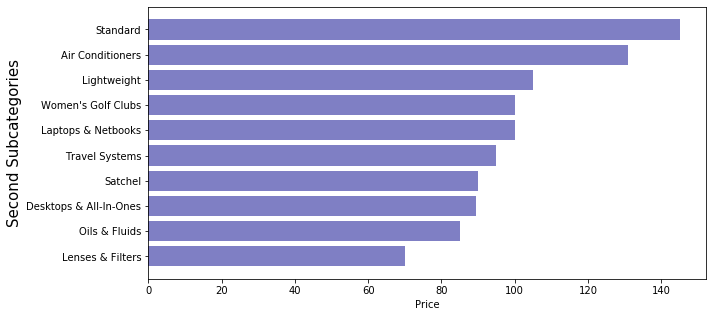

In [0]:
plt.figure(figsize=(10,5))
plt.barh(range(len(subcat_2_median_bottom),0,-1), subcat_2_median_bottom['price'], align='center', alpha=0.5, color='darkblue')
plt.yticks(range(len(subcat_2_median_bottom),0,-1), subcat_2_median_bottom.index, fontsize = 10)
plt.xticks(fontsize=10)
# plt.title('Bottom 10 Second Subcategories sorted by median price', fontsize=15)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Second Subcategories', fontsize=15)
plt.show()

##  Brand

In [0]:
(data['brand_name'].value_counts(normalize=True)*100).head(10)

PINK                 6.364395
Nike                 6.359100
Victoria's Secret    5.652272
LuLaRoe              3.650514
Apple                2.038235
FOREVER 21           1.786897
Nintendo             1.765835
Lululemon            1.713002
Michael Kors         1.638872
American Eagle       1.559564
Name: brand_name, dtype: float64

In [0]:

print('There are', data['brand_name'].nunique(), 'unique brands in the data')

There are 4809 unique brands in the data


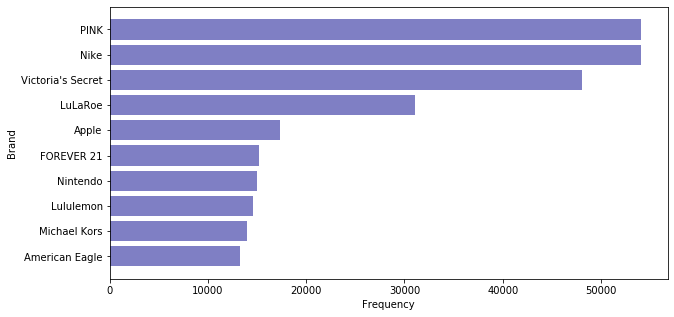

In [0]:
x = data['brand_name'].value_counts().index[:10]
y = data['brand_name'].value_counts().values[:10]

plt.figure(figsize=(10,5))
plt.barh(range(len(x),0,-1), y, align='center', alpha=0.5, color='darkblue')
plt.yticks(range(len(x),0,-1), x, fontsize=10)
plt.xticks(fontsize=10)
# plt.title('Top 10 Most Popular Brands', fontsize=15)
plt.xlabel('Frequency', fontsize=10)
plt.ylabel('Brand', fontsize=10)
plt.show()

In [0]:
brand = data.groupby('brand_name')
brand_median = pd.DataFrame(brand['price'].median())

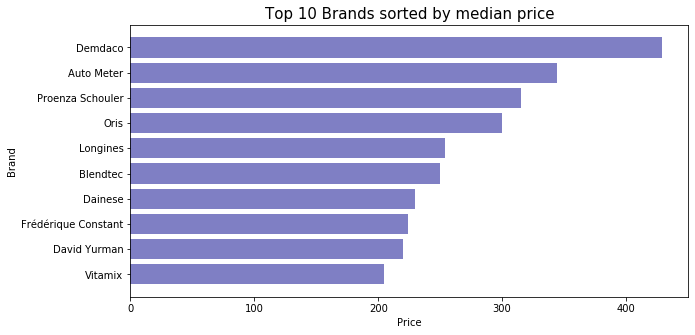

In [0]:
brand = data.groupby('brand_name')
brand_median = pd.DataFrame(brand['price'].median())
brand_median = brand_median.sort_values(ascending=True, by='price')
brand_median_top = brand_median[-10:]
brand_median_bottom = brand_median[0:10]

plt.figure(figsize=(10,5))
plt.barh(range(0,len(brand_median_top)), brand_median_top['price'], align='center', alpha=0.5, color='darkblue')
plt.yticks(range(0,len(brand_median_top)), brand_median_top.index, fontsize=10)
plt.xticks(fontsize=10)
plt.title('Top 10 Brands sorted by median price', fontsize=15)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Brand', fontsize=10)
plt.show()

After looking at the box plots, although there is good amount of overlap, we can say that there is a considerable difference in the prices when the brand is given and when it's not given. The median price of the product when the brand name is given is 20 dollars and when the brand name is not given, the median price is 14$. In a nutshell, this feature will be helpful for the ML model to map some kind of pattern from it.

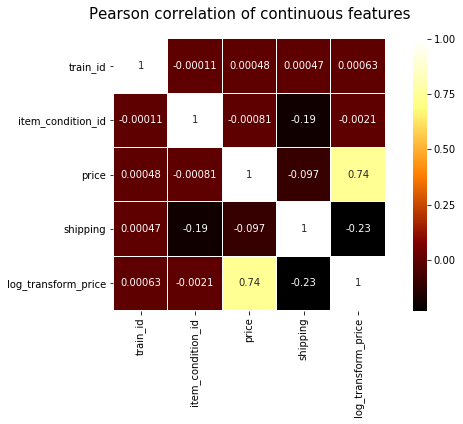

In [0]:
colormap = plt.cm.afmhot
plt.figure(figsize=(10,5))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
ax = sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

**Filling Null Brands**

In [0]:
print('Filling null values...')

data.brand_name.fillna('unk_brand', inplace=True)


Filling null values...


In [0]:
print('Guessing null Brands from name and category...')

# Returning Unique List.
def concat_categories(x):
    return set(x.values)

#Getting unique categories for each brand as a dict 
brand_names_categories = dict(data[data['brand_name'] != 'unk_brand'][['brand_name','category_name']].astype('str').groupby('brand_name').agg(concat_categories).reset_index().values.tolist())
print(brand_names_categories)


Guessing null Brands from name and category...
{'!iT Jeans': {'Women/Jeans/Capri, Cropped'}, '% Pure': {'Beauty/Hair Care/Shampoo & Conditioner Sets', 'Beauty/Skin Care/Face', 'Beauty/Bath & Body/Scrubs & Body Treatments', 'Beauty/Makeup/Face', 'Beauty/Makeup/Eyes', 'Beauty/Skin Care/Feet', 'Beauty/Makeup/Lips', 'Beauty/Hair Care/Hair Loss Products', 'Beauty/Skin Care/Eyes', 'Beauty/Skin Care/Body', 'Beauty/Fragrance/Women', 'Beauty/Fragrance/Men', 'Beauty/Fragrance/Kids', 'Beauty/Hair Care/Hair & Scalp Treatments', 'Beauty/Fragrance/Candles & Home Scents', 'Beauty/Skin Care/Sets & Kits', 'Beauty/Makeup/Makeup Sets', 'Beauty/Skin Care/Maternity', 'Beauty/Makeup/Makeup Palettes', 'Beauty/Bath & Body/Bath'}, '10.Deep': {"Men/Men's Accessories/Hats", 'Men/Athletic Apparel/Jackets', 'Men/Tops/T-shirts'}, '191 Unlimited': {'Women/Tops & Blouses/T-Shirts'}, '1byone': {'Electronics/TV, Audio & Surveillance/Televisions'}, '21men': {'Men/Athletic Apparel/Shorts', 'Men/Tops/T-shirts', 'Men/Coats

In [0]:
#Validating unique categories for each brand as a dict 
data[data['brand_name'] == '% Pure']['category_name'].unique()

array(['Beauty/Makeup/Lips', 'Beauty/Makeup/Face',
       'Beauty/Skin Care/Body', 'Beauty/Makeup/Makeup Palettes',
       'Beauty/Skin Care/Face', 'Beauty/Fragrance/Candles & Home Scents',
       'Beauty/Hair Care/Shampoo & Conditioner Sets',
       'Beauty/Makeup/Eyes', 'Beauty/Bath & Body/Bath',
       'Beauty/Bath & Body/Scrubs & Body Treatments',
       'Beauty/Skin Care/Maternity', 'Beauty/Skin Care/Feet',
       'Beauty/Fragrance/Men', 'Beauty/Makeup/Makeup Sets',
       'Beauty/Hair Care/Hair & Scalp Treatments',
       'Beauty/Hair Care/Hair Loss Products', 'Beauty/Fragrance/Kids',
       'Beauty/Fragrance/Women', 'Beauty/Skin Care/Eyes',
       'Beauty/Skin Care/Sets & Kits'], dtype=object)

In [0]:
#Brands sorted by length (decreasinly), so that longer brand names have precedence in the null brand search
brands_sorted_by_size = list(sorted(filter(lambda y: len(y) >= 3, list(brand_names_categories.keys())), key = lambda x: -len(x)))

In [0]:
#Count of unknow brand in the dataset.
brand_name_null_count = len(data.loc[data['brand_name'] == 'unk_brand'])

In [0]:
brand_name_null_count

632682

In [0]:
#Try to guess the Brand based on Name and Category. Returning brand name if brand is 'name' and category in 'brand_names_categories'.
def brandfinder(name, category):    
    for brand in brands_sorted_by_size:
        if brand in name and category in brand_names_categories[brand]:
          
            return brand
        
    return 'unk_brand'


In [0]:
train_names_unknown_brands = data[data['brand_name'] == 'unk_brand'][['name','category_name']].astype('str').values
train_estimated_brands = Parallel(n_jobs=1)(delayed(brandfinder)(name, category) for name, category in train_names_unknown_brands) #Returns generator object.
#print(train_estimated_brands)
data.loc[data['brand_name'] == 'unk_brand', 'brand_name'] = train_estimated_brands

found = brand_name_null_count-len(data.loc[data['brand_name'] == 'unk_brand'])
print("Null brands found: %d from %d" % (found, brand_name_null_count))

Null brands found: 87216 from 632682


In [0]:
data_brand = data[data['brand_name'] != 'unk_brand']

In [0]:

x = data_brand['brand_name'].value_counts().index[:10]

x

Index(['Nike', 'PINK', 'Victoria's Secret', 'LuLaRoe', 'Apple', 'Nintendo',
       'FOREVER 21', 'Lululemon', 'Michael Kors', 'Rae Dunn'],
      dtype='object')

In [0]:
y = data_brand['brand_name'].value_counts().values[:10]
y

array([55991, 55969, 49184, 38620, 19004, 15857, 15192, 14873, 14710,
       14473])

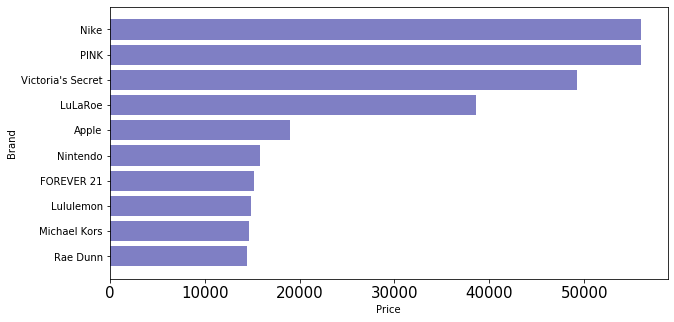

In [0]:
plt.figure(figsize=(10,5))
plt.barh(range(len(x),0,-1), y, align='center', alpha=0.5, color='darkblue')
plt.yticks(range(len(x),0,-1), x, fontsize=10)
plt.xticks(fontsize=15)
# plt.title('Top 10 Most Popular Brands', fontsize=15)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Brand', fontsize=10)
plt.show()

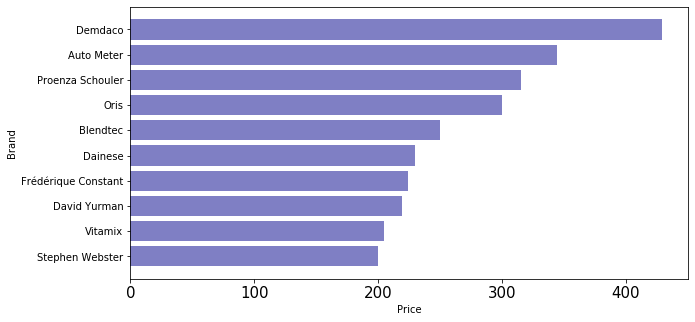

In [0]:
brand = data.groupby('brand_name')
brand_median = pd.DataFrame(brand['price'].median())
brand_median = brand_median.sort_values(ascending=True, by='price')
brand_median_top = brand_median[-10:]
brand_median_bottom = brand_median[0:10]

plt.figure(figsize=(10,5))
plt.barh(range(0,len(brand_median_top)), brand_median_top['price'], align='center', alpha=0.5, color='darkblue')
plt.yticks(range(0,len(brand_median_top)), brand_median_top.index, fontsize=10)
plt.xticks(fontsize=15)
# plt.title('Top 10 Brands sorted by median price', fontsize=15)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Brand', fontsize=10)
plt.show()

## Price column stats

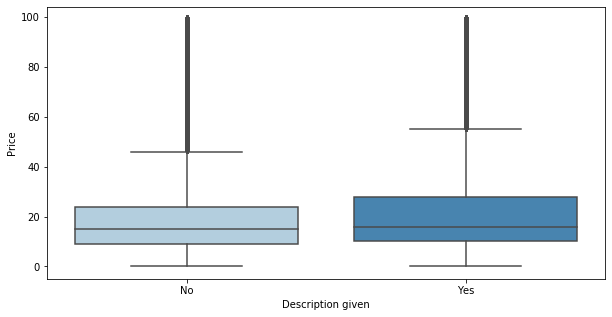

In [0]:
#Excluding price < 100 , to avoid outliers.
price_100 = data[data['price']<100]

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='description_given', y='price', data=price_100, ax=ax, palette= 'Blues')
plt.xlabel('Description given', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [0]:
desc_given = data.groupby('description_given') # Grouped description_given with values("Yes" and "No"). 
print(desc_given)

In [0]:
desc_given_median = pd.DataFrame(desc_given['price'].describe()) # Getting the statistics of description_given with values("Yes" and "No") 
desc_given_median